In [1]:
#load modules
from Bio import Entrez, Seq, SeqIO, pairwise2, Align
import numpy as np

#load nucleotide sequences from NCBI 
def get_seq(db, key, rettype="gb"):
    Entrez.email = "A.N.Other@example.com"
    handle = Entrez.efetch(db=db, id=key, rettype=rettype)
    return SeqIO.read(handle, "gb")

## Call NCBI API

In [2]:
#[welche daten werden geladen?]
#hvr-1
nea_1a = get_seq("nucleotide", "AF011222")
nea_1b = get_seq("nucleotide", "AF282971")

#[welche daten werden geladen?]
#hvr-2
nea_2a = get_seq("nucleotide", "AF142095")
nea_2b = get_seq("nucleotide", "AF282972")

In [3]:
n = 206 #known length

nea_1 = nea_1a.seq + nea_2a.seq
nea_2 = nea_1b.seq + nea_2b.seq

# Trim sequences with local alignment

In [115]:
nea_1_algn = []
sequences = []
tmp_sequences = []
scores = []
starts = []
ends = []
span = []
human_ids = []
with open("d_loop.fasta", "r") as handle:
    d_loop = list(SeqIO.parse(handle, "fasta"))
    for a in d_loop:
        sequences.append(a)
        human_ids.append(a.id)
    for i in range(206):
        alignment = pairwise2.align.localms(sequences[i].seq, nea_1, 5, -4, -8, -8)
        tmp_sequence = alignment[i][0]
        starts.append(alignment[i][3])
        ends.append(alignment[i][4])
        span.append(alignment[i][4]-alignment[i][3])
        tmp_sequences.append(tmp_sequence)
        scores.append(alignment[i][2])
        nea_1_algn.append(alignment[i][1])
"""    for j in range(203,206):
        alignment = pairwise2.align.localms(sequences[j].seq, nea_1, 5, -4, -8, -8)
        tmp_sequence = alignment[j][0]
        starts.append(alignment[j][3])
        ends.append(alignment[j][4])
        span.append(alignment[j][4]-alignment[i][3])
        tmp_sequences.append(tmp_sequence)
        scores.append(alignment[j][2])"""

IndexError: list index out of range

In [116]:
sequences = []
with open("d_loop.fasta", "r") as handle:
    d_loop = list(SeqIO.parse(handle, "fasta"))
    for a in d_loop:
        sequences.append(a)
    for j in range(203,206):
        alignment = pairwise2.align.localms(sequences[j].seq, nea_1, 5, -4, -8, -8)
        tmp_sequence = alignment[j][0]
        starts.append(alignment[j][3])
        ends.append(alignment[j][4])
        span.append(alignment[j][4]-alignment[i][3])
        tmp_sequences.append(tmp_sequence)
        scores.append(alignment[j][2])

IndexError: list index out of range

In [28]:
trimmed_sequences = []
smallest_val = min(span)
var = span.index(smallest_val)
start = starts[var]
end = ends[var]

for l in range(len(tmp_sequences)):
    whole_sequence = tmp_sequences[l]
    trimmed_sequence = whole_sequence[start:end]
    trimmed_sequences.append(trimmed_sequence)
    

In [53]:
def trimmer(seq):
    start = 0
    var = False
    while var == False:
        if seq[start] != "-":
            var = True
        else:
            start += 1
    var = False
    end = len(seq) -1
    return seq[start:start+min(span)]
    

nea_1_trimmed = trimmer(nea_1_algn[var])
trimmed_sequences.append(nea_1_trimmed)
nea_alignment = pairwise2.align.localms(nea_1_trimmed, nea_2, 5, -4, -8, -8)
nea_2_untrimmed = nea_alignment[0][1]
nea_2_trimmed = nea_2_untrimmed[0:min(span)]
trimmed_sequences.append(nea_2_trimmed)



In [117]:
record_trimmed_list = []
for k in range(len(trimmed_sequences)-2):
    x_1 = str(k+1)
    x_2 = "human_"
    x = str(x_2 + x_1)
    record_trimmed_list.append(SeqRecord(Seq(trimmed_sequences[k], generic_dna), id= x))
for j in range(len(trimmed_sequences)-2, len(trimmed_sequences)):
    x_1 = str(j-len(trimmed_sequences)+3)
    x_2 = "nea_"
    x = str(x_2 + x_1)
    record_trimmed_list.append(SeqRecord(Seq(trimmed_sequences[k], generic_dna), id= x))
with open("alignment_w_nea.fasta", "w") as output_handle:
    SeqIO.write(record_trimmed_list, output_handle, "fasta")


In [119]:
human_ids = human_ids[0:202]
human_ids.append("nea_1")
human_ids.append("nea_2")

In [120]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
record_trimmed_list = []
for k in range(len(trimmed_sequences)):
    record_trimmed_list.append(SeqRecord(Seq(trimmed_sequences[k], generic_dna), id=human_ids[k]))
align = MultipleSeqAlignment(record_trimmed_list)
calculator = DistanceCalculator('identity')
d = calculator.get_distance(align)

In [132]:
n_tree = constructor.upgma(d)

In [133]:
from Bio import Phylo
Phylo.draw_ascii(n_tree)


            , nea_2
  __________|
 |          | nea_1
 |
 |           ____ Tonga(AY289102).txt
 |         _|
 |        | |____ PNGCoast(AY289076).txt
 |  ______|
 | |      |   ___ Tuvan(AY519495).txt
 | |      |__|
 | |         |___ Cook(AY289068).txt
 | |
 | |         ______ Thai(AY289101).txt
 | |      __|
 | |     |  |______ Negidal'tsy(AY519489).txt
 | |     |
_| |  ___|         , Tofalar-Negidal(AY195770).txt
 | | |   |        ,|
 | | |   |        |, Korea(AF346993).txt
 | | |   |        ||
 | | |   |________|| Khirgiz(AF346991).txt
 | | |            |
 | | |            |, Samoa(AF347007).txt
 | | |            ||
 | | |             | Cook(AY289069).txt
 | | |
 | | |           , Samoa(AY289093).txt
 | | |           |
 | | |   ________| PNGCoast(AY289080).txt
 | | |  |        |
 | | | _|        | PNGCoast(AY289077).txt
 | | || |
 |_| || |________ Chinese(AF346972).txt
   | ||
   | ||     _______ Tofalar(AY519492).txt
   | ||    |
   | ||    |         __ Mansi(AY570524).txt
   | ||  

In [124]:
help(Phylo.draw_ascii)

Help on function draw_ascii in module Bio.Phylo._utils:

draw_ascii(tree, file=None, column_width=80)
    Draw an ascii-art phylogram of the given tree.
    
    The printed result looks like::
    
                                        _________ Orange
                         ______________|
                        |              |______________ Tangerine
          ______________|
         |              |          _________________________ Grapefruit
        _|              |_________|
         |                        |______________ Pummelo
         |
         |__________________________________ Apple
    
    
    :Parameters:
        file : file-like object
            File handle opened for writing the output drawing. (Default:
            standard output)
        column_width : int
            Total number of text columns used by the drawing.



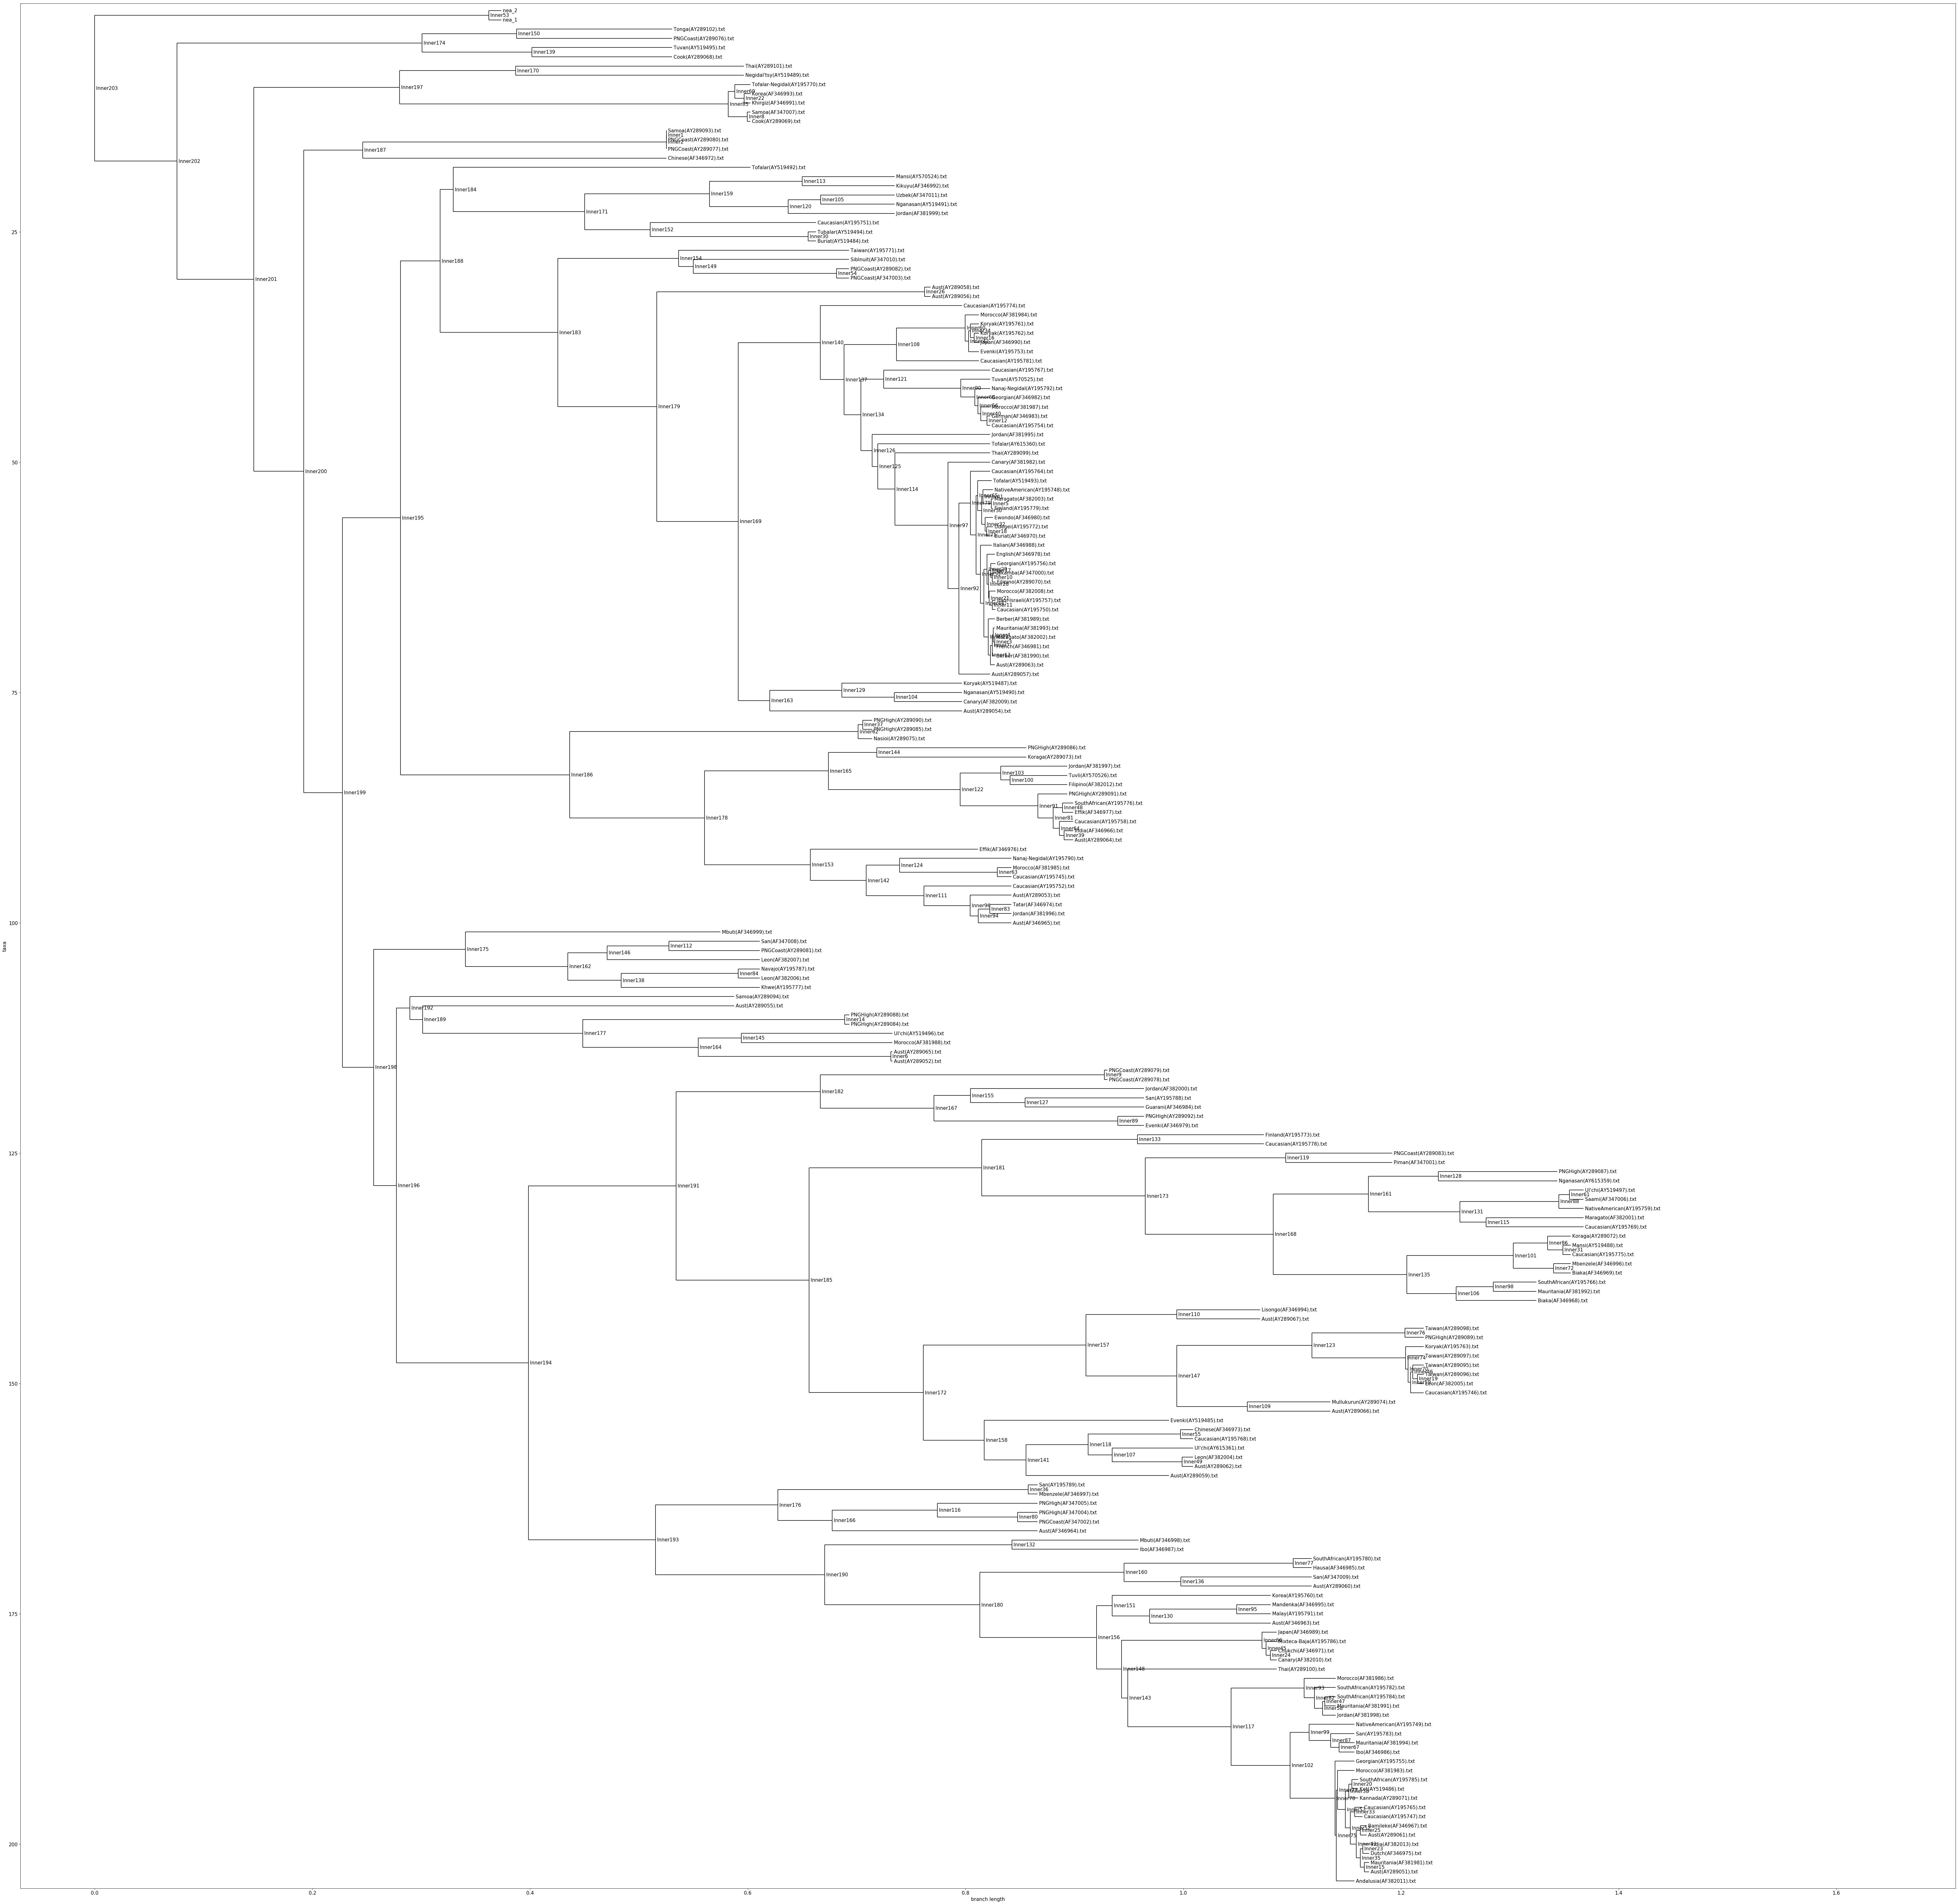

In [141]:
import matplotlib
matplotlib.rc('font', size=14)
fig = plt.figure(figsize=(100, 100), dpi=80)
    # alternatively
    # fig.set_size_inches(10, 20)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(n_tree, axes=axes)

In [142]:
print(n_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner203')
        Clade(branch_length=0.36214262078233883, name='Inner53')
            Clade(branch_length=0.011331444759206777, name='nea_2')
            Clade(branch_length=0.011331444759206777, name='nea_1')
        Clade(branch_length=0.07575805987582318, name='Inner202')
            Clade(branch_length=0.22497559129854094, name='Inner174')
                Clade(branch_length=0.08675637393767702, name='Inner150')
                    Clade(branch_length=0.14305949008498586, name='Tonga(AY289102).txt')
                    Clade(branch_length=0.14305949008498586, name='PNGCoast(AY289076).txt')
                Clade(branch_length=0.10092067988668554, name='Inner139')
                    Clade(branch_length=0.12889518413597734, name='Tuvan(AY519495).txt')
                    Clade(branch_length=0.12889518413597734, name='Cook(AY289068).txt')
            Clade(branch_length=0.07031907571780438, name='Inner201')
                Clade(bra

In [131]:
print(tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner203')
        Clade(branch_length=0.36214262078233883, name='Inner53')
            Clade(branch_length=0.011331444759206777, name='203')
            Clade(branch_length=0.011331444759206777, name='202')
        Clade(branch_length=0.07575805987582318, name='Inner202')
            Clade(branch_length=0.22497559129854094, name='Inner174')
                Clade(branch_length=0.08675637393767702, name='Inner150')
                    Clade(branch_length=0.14305949008498586, name='192')
                    Clade(branch_length=0.14305949008498586, name='144')
                Clade(branch_length=0.10092067988668554, name='Inner139')
                    Clade(branch_length=0.12889518413597734, name='194')
                    Clade(branch_length=0.12889518413597734, name='51')
            Clade(branch_length=0.07031907571780438, name='Inner201')
                Clade(branch_length=0.1339907215290806, name='Inner197')
                    Cla

In [143]:
help(constructor.upgma)

Help on method upgma in module Bio.Phylo.TreeConstruction:

upgma(distance_matrix) method of Bio.Phylo.TreeConstruction.DistanceTreeConstructor instance
    Construct and return an UPGMA tree.
    
    Constructs and returns an Unweighted Pair Group Method
    with Arithmetic mean (UPGMA) tree.
    
    :Parameters:
        distance_matrix : DistanceMatrix
            The distance matrix for tree construction.

